#1)Importing libraries and loading the data



In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [ ]:
def fff(x):
  with open(x) as file: 
    line = []
    for lines in file.readlines():
      line.append(lines)
    return line
line = fff('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/train.txt')

In [ ]:
line[0:15]

['i didnt feel humiliated;sadness\n',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n',
 'im grabbing a minute to post i feel greedy wrong;anger\n',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n',
 'i am feeling grouchy;anger\n',
 'ive been feeling a little burdened lately wasnt sure why that was;sadness\n',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n',
 'i feel as confused about life as a teenager or as jaded as a year old man;fear\n',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n',
 'i feel romantic too;love\n',
 'i feel like i have to make the suffering i m seeing mean something;sadness\n',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\n'

In [ ]:
def csv(line):
  list1,list2 = [],[]
  for lines in line:
    x,y = lines.split(';')
    y = y.replace('\n','')
    list1.append(x)
    list2.append(y)
  df = pd.DataFrame(list(list1),columns=['sentence'])
  df['emotion'] = list2
  return df

In [ ]:
df = csv(line)

In [ ]:
df

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


#2)Exploratory data analysis

In [ ]:
df.emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


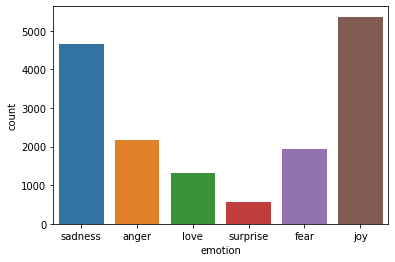

In [ ]:
sns.countplot(df.emotion)

here we have imbalance data. suprise and love are not as frequent as joy and sadness 

##2.1)Handling null values

In [ ]:
df.isnull().sum()

sentence    0
emotion     0
dtype: int64

##2.2)Feature engineering


###i)Text preprocessing
####stopwords
####**lematization**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
wn = WordNetLemmatizer()
def lem(x):
  corpus = []
  for line in x:
    words = line.split()
    y = [wn.lemmatize(word.lower()) for word in words if not word in stopwords.words('english')]
    y = ' '.join(y)
    corpus.append(y)
  return corpus
x = lem(df['sentence'])

In [ ]:
x[:5]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

###ii)feature creation

####a)vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection 

In [ ]:
tf_vec = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
x_train = tf_vec.fit_transform(x).toarray()

In [ ]:
x_train = pd.DataFrame(x_train)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


along with vectorization we have some features we can create like 
####b)lenth 


In [ ]:
df['sen_len'] = df['sentence'].apply(lambda x: len(x))
df

,sentence,emotion,sen_len
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


####c)avg_word_lenth 

In [ ]:
def avg_word_len(sen):
  words = sen.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return(word_len/len(word))

In [ ]:
df['avg_word_len'] = df['sentence'].apply(lambda x: avg_word_len(x))
df

,sentence,emotion,sen_len,avg_word_len
0,i didnt feel humiliated,sadness,23,2.000000
1,i can go from feeling so hopeless to so damned...,sadness,108,17.600000
2,im grabbing a minute to post i feel greedy wrong,anger,48,7.800000
3,i am ever feeling nostalgic about the fireplac...,love,92,9.375000
4,i am feeling grouchy,anger,20,2.428571
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,39.000000
15996,i am now turning and i feel pathetic that i am...,sadness,102,13.833333
15997,i feel strong and good overall,joy,30,3.571429
15998,i feel like this was such a rude comment and i...,anger,59,46.000000


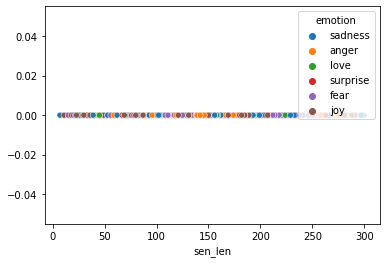

In [ ]:
sns.scatterplot(x=df['sen_len'], y=np.zeros_like(df['sen_len']), hue=df['emotion'])

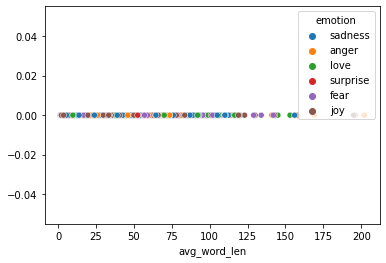

In [ ]:
sns.scatterplot(x=df['avg_word_len'], y=np.zeros_like(df['avg_word_len']), hue=df['emotion'])

we can clearly see there is no definite relation between emotion and sentence length. so, the feature is of no use

##2.3)Feature selection

In [ ]:
y = df["emotion"]
x_names = tf_vec.get_feature_names()
p_value_limit = 0.95
df_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(x_train, y==cat)
    df_features = df_features.append(pd.DataFrame(
                   {"feature":x_names, "score":1-p, "y":cat}))
    df_features = df_features.sort_values(["y","score"], 
                    ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
x_names = df_features["feature"].unique().tolist()
len(x_names)

1884

In [ ]:
x_train = tf_vec.fit_transform(df['sentence']).toarray()

#handling test data

In [ ]:
test_line = fff('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/test.txt') 
test_df = csv(test_line)
x_ = lem(test_df['sentence'])

In [ ]:
x_test = tf_vec.transform(x_).toarray()

labelling test and train data

In [ ]:
y_train = df.iloc[:,1].values


In [ ]:
y_test = test_df.iloc[:,1].values

#building and training the model

In [ ]:
print(len(x_train),
len(x_test),
len(y_train),
len(y_test))

16000 2000 16000 2000


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.781


In [ ]:
sen = ["you are making me cry"]
sen = lem(sen)
print(sen)
sen = tf_vec.transform(sen).toarray()
model.predict(sen)[0]


['making cry']


'sadness'

In [ ]:
# import joblib
# with open('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/nlp_emotion.sav', 'wb') as file:
#    joblib.dump(model, file)

In [ ]:
# with open('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/vecfile.sav', 'wb') as file:
#     joblib.dump(cv, file)